In [1]:
import torch
from torch.autograd import grad
import numpy as np
from GRPytorch_metrics import schwarchild_metric
Mass = 1000

coordinates = [1000.0,3*Mass,np.pi/2,0.0] #t,r,theta,phi

coords = torch.tensor(coordinates,requires_grad=True)



This notebook compares the symbolic result from EinsteinPy to the 

In [2]:
from GRPytorch_models import SpaceTimeMetricModule
from GRPytorch_metrics import schwarchild_metric

schwar_metric_function = lambda x: schwarchild_metric(x,Mass=Mass)
schwar_module = SpaceTimeMetricModule(schwar_metric_function)

In [3]:
import sympy
from sympy import simplify
from einsteinpy.symbolic import RiemannCurvatureTensor
from einsteinpy.symbolic.predefined import Schwarzschild, DeSitter, AntiDeSitter, Minkowski, find

sympy.init_printing()  # for pretty printing

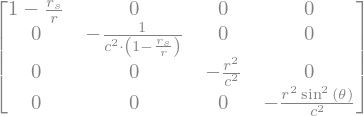

In [4]:
sch = Schwarzschild()
sch.tensor()

In [6]:
rieman_symbolic = RiemannCurvatureTensor.from_metric(sch)

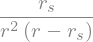

In [12]:
rieman_symbolic.tensor()[0,1,0,1]

In [11]:
# Copy over the symbolic result

rs = (2*Mass)

Rieman0101 = lambda r : rs/(r*r*(r-rs))


In [13]:
import numpy as np
# Get the r-values from 2.1* M to 6.0*M

num_points = 1000
rvalues = np.linspace(2.1*Mass, 6.0*Mass, num_points)

analytic_R0101_result = [Rieman0101(r) for r in rvalues]

In [14]:
# Create a riemann module
from GRPytorch_models import RiemannTensor

riemann_module = RiemannTensor(schwar_module)

In [15]:
# Compute the Rieman tensor on [0,r,\pi/2,0] for all the r-values

coords = [[0.0,r,np.pi/2.0,0.0] for r in rvalues]

riemann_tensor_evaluation = riemann_module(torch.tensor(coords))

In [17]:
# Get R^{0}_{1,0,1}

grpytorcR0101 = []

for coord_ind in range(riemann_tensor_evaluation.size()[0]):
    grpytorcR0101.append(riemann_tensor_evaluation[coord_ind,0,1,0,1])

Text(0, 0.5, 'Rieman0101')

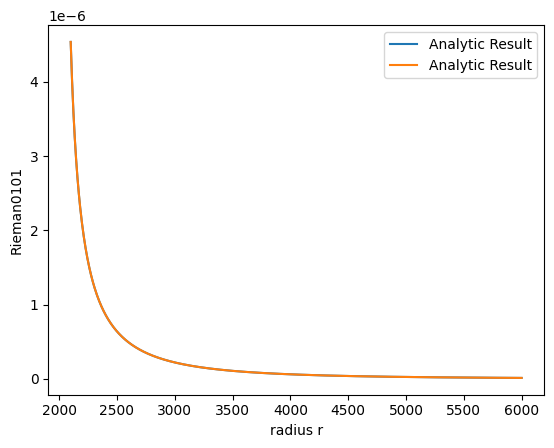

In [21]:
# Plot the analytic and automatic differentiation result
import matplotlib.pyplot as plt

plt.plot(rvalues,analytic_R0101_result,label='Analytic Result')
plt.plot(rvalues,grpytorcR0101,label='Analytic Result')
plt.legend()
plt.xlabel('radius r')
plt.ylabel('Rieman0101')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Rieman0101 Error')

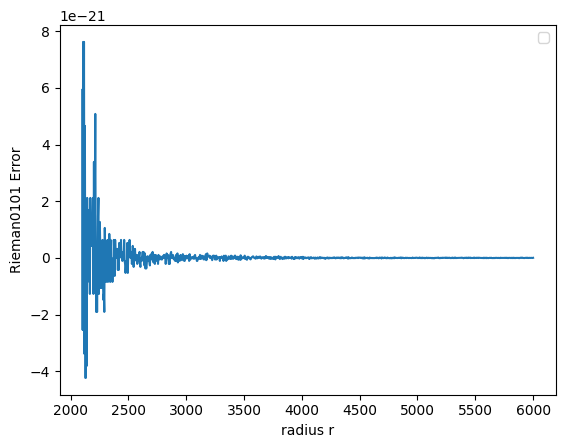

In [22]:
# Plot the error since it's hard to see a difference

# Plot the analytic and automatic differentiation result
import matplotlib.pyplot as plt

plt.plot(rvalues,np.array(analytic_R0101_result) - np.array(grpytorcR0101))
plt.legend()
plt.xlabel('radius r')
plt.ylabel('Rieman0101 Error')
